<a href="https://colab.research.google.com/github/songjuhye/Clustering-according-to-taste-and-food-ingredients_graduationProject/blob/main/%EC%A1%B8%EB%85%BC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_csv = '/content/drive/My Drive/graduation/database9.3_0.2.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(file_csv)
df

,색인(Index),식품군(Food groups),식품코드(Food Code),식품명(국문)(Food and Description(Korean)),식품명(영문)(Food and Description(English)),"글루탐산(Glutamic acid, GLU, mg)"
0,5,곡류및그제품,A003001A010a,"기장, 찰기장, 도정, 생것","Prosomillet, Glutinous, Polished, Raw",2535
1,3148,곡류및그제품,A003002A010a,"기장, 찰기장, 이백찰, 도정, 생것","Prosomillet, Glutinous, Ibaekchal, Polished, Raw",2359
2,3149,곡류및그제품,A003003A010a,"기장, 찰기장, 한라찰, 도정, 생것","Prosomillet, Glutinous, Hallachal, Polished, Raw",2218
3,3150,곡류및그제품,A003004A010a,"기장, 찰기장, 황실찰, 도정, 생것","Prosomillet, Glutinous, Hwangsilchal, Polished...",2798
4,6,곡류및그제품,A004000A010a,"메밀, 도정, 생것","Buckwheat, Polished, Raw",2386
...,...,...,...,...,...,...
1598,2993,기타,T021003000Na,"인삼, 홍삼, 추출","Korean ginseng(Panax ginseng C. A. Mey.), Red ...",27
1599,3147,기타,T0300002601a,"장수풍뎅이, 유충, 말린것","Allomyrina dichotoma, Larva, Dried",912
1600,2997,기타,T0250030001a,"팽창제, 효모, 말린것","Leavening agent, Yeast, Dried",5900
1601,2999,기타,T0290002601a,"흰점박이 꽃무지, 유충, 말린것","Protaetia brevitarsis, Larva, Dried",6400


In [ ]:
print(df.iloc[:, 5])

0       2535
1       2359
2       2218
3       2798
4       2386
        ... 
1598      27
1599     912
1600    5900
1601    6400
1602    1966
Name: 글루탐산(Glutamic acid, GLU, mg), Length: 1603, dtype: int64


In [ ]:
variation = df['글루탐산(Glutamic acid, GLU, mg)'].var()

print(variation)

2798967.023341068


In [ ]:
X = df.iloc[:,5]
Y = X

No handles with labels found to put in legend.


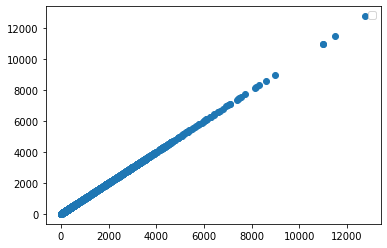

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.legend()
plt.show()

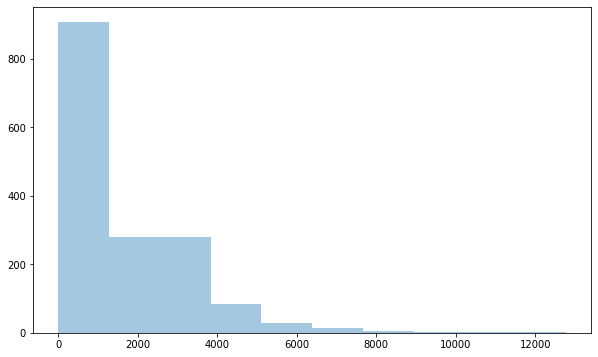

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X, bins=10, alpha=0.4)
plt.show()

<class 'numpy.ndarray'>


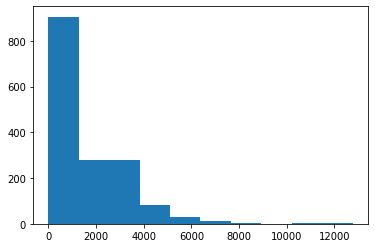

In [ ]:
z = np.float32(X)
print(type(z))
plt.hist(z)
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:2834: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


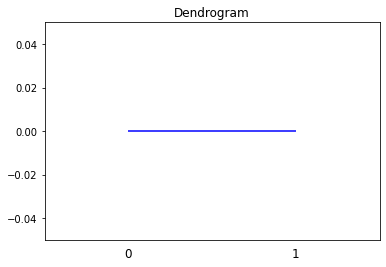

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Xdist = pdist([X, X], metric='euclidean')
Z = linkage(Xdist, method='ward')
Zd = dendrogram(Z)
plt.title('Dendrogram')
plt.show()

In [ ]:
X = np.array(X)
print(X.ndim) # 배열의 차원
print(X.shape) # 배열의 크기
print(type(X)) # X의 형
print(type([X,X]))
arr = [X,Y]
arr = np.array(arr)
print(type(arr))
print('바꾸기전 행렬 크기 : ', arr.shape)
arr = np.transpose(arr)
print('바꾼 행렬 크기 : ', arr.shape)
print(arr[:,0].shape)
print(arr)

1
(1603,)
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
바꾸기전 행렬 크기 :  (2, 1603)
바꾼 행렬 크기 :  (1603, 2)
(1603,)
[[2535 2535]
 [2359 2359]
 [2218 2218]
 ...
 [5900 5900]
 [6400 6400]
 [1966 1966]]


[3 3 0 ... 4 4 0]
[[2535 2535]]


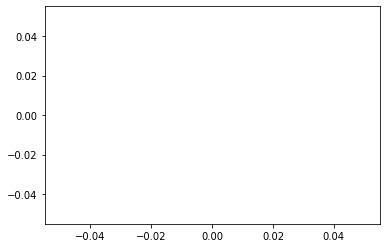

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr) #수정 필요. 공부도...
print(kmeans.labels_) # 이거 왜 [0,0]으로 출력되냐;;;
colormap = np.array(['c', 'g', 'b', 'm', 'r'])
print(arr[:1])
plt.scatter(arr[:0], arr[:0])
plt.show()

[3 3 0 ... 4 4 0]
[[1637.87828947 1637.87828947]
 [ 274.03121248  274.03121248]
 [8222.72727273 8222.72727273]
 [3061.06725146 3061.06725146]
 [4831.54901961 4831.54901961]]


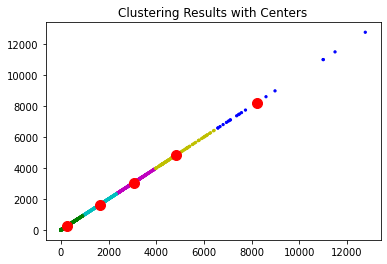

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr) #수정 필요. 공부도...
print(kmeans.labels_) # 이거 왜 [0,0]으로 출력되냐;;;
colormap = np.array(['c', 'g', 'b', 'm', 'y'])
#plt.scatter(arr[:0], arr[:0], s=5)
plt.scatter(arr[:,0], arr[:,0], s=5, c=colormap[pred_y])
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.title('Clustering Results with Centers')
plt.show()

[4 4 4 ... 3 3 4]
[[1256.76146789 1256.76146789]
 [ 243.84848485  243.84848485]
 [4579.75280899 4579.75280899]
 [6813.23529412 6813.23529412]
 [2249.26605505 2249.26605505]
 [3241.27016129 3241.27016129]]


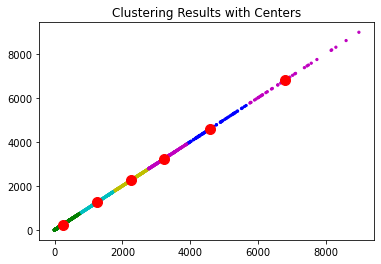

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr) #수정 필요. 공부도...
print(kmeans.labels_) # 이거 왜 [0,0]으로 출력되냐;;;
colormap = np.array(['c', 'g', 'b', 'm', 'y', 'm'])
#plt.scatter(arr[:0], arr[:0], s=5)
plt.scatter(arr[:,0], arr[:,0], s=5, c=colormap[pred_y])
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.title('Clustering Results with Centers')
plt.show()

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

a, b = make_blobs(n_samples=300, centers=4, cluster_std=0.06, random_state=0)
print(a.shape)
print(b.shape)
print(type(a))
print(type(b))

In [ ]:
inertia_arr = []

k_range = range(2, 16)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(arr)
  interia = kmeans.inertia_
  print('k : ', k, '  ', 'cost : ', interia)
  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

k :  2    cost :  2734478529.5316944
k :  3    cost :  1375816489.644557
k :  4    cost :  813760713.763931
k :  5    cost :  535106126.52533364
k :  6    cost :  392379120.4186399
k :  7    cost :  278789171.58977246
k :  8    cost :  214347051.38562512
k :  9    cost :  163477488.10542208
k :  10    cost :  125379392.86220258
k :  11    cost :  103373837.52140279
k :  12    cost :  87688248.13676156
k :  13    cost :  75300009.3432523
k :  14    cost :  65177565.65428816
k :  15    cost :  55256627.78144785


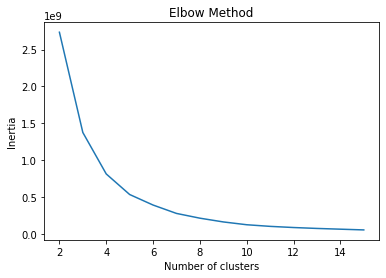

In [ ]:
plt.plot(k_range, inertia_arr)
plt.vlines(2, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters =  2 The average silhouette_score is :  0.6895691816660342
For n_clusters =  3 The average silhouette_score is :  0.6907042836556162
For n_clusters =  4 The average silhouette_score is :  0.6654695066840265
For n_clusters =  5 The average silhouette_score is :  0.6661029073869343
For n_clusters =  6 The average silhouette_score is :  0.6605917319164553
For n_clusters =  7 The average silhouette_score is :  0.6392918957171975
For n_clusters =  8 The average silhouette_score is :  0.5982554389443387
For n_clusters =  9 The average silhouette_score is :  0.5987795037745187


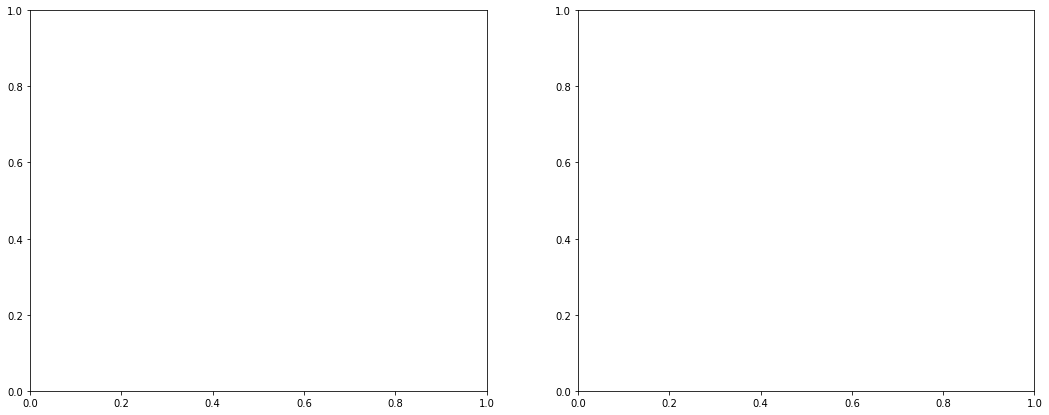

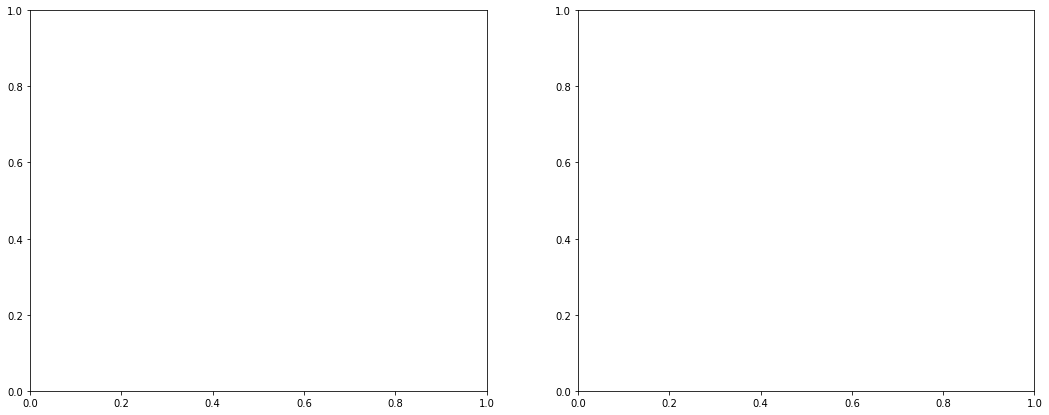

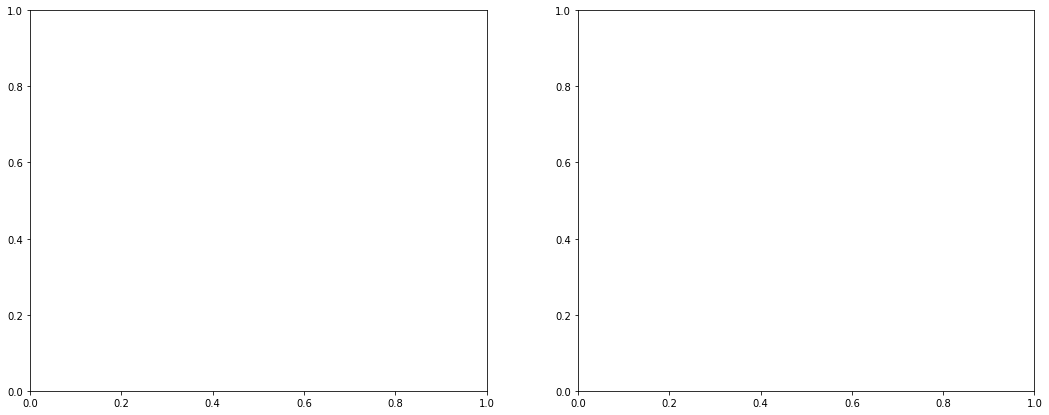

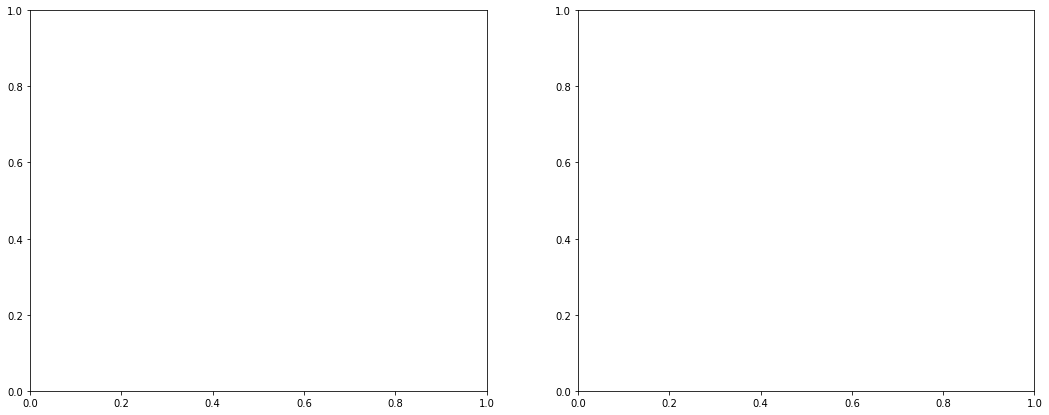

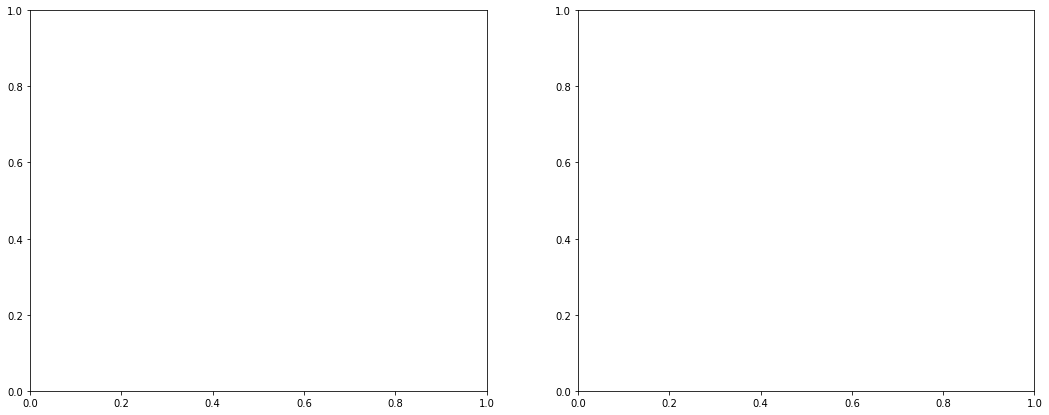

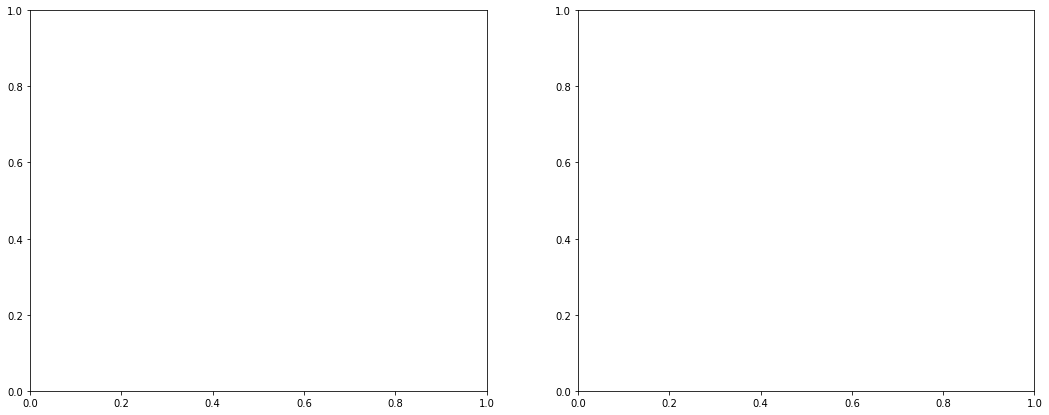

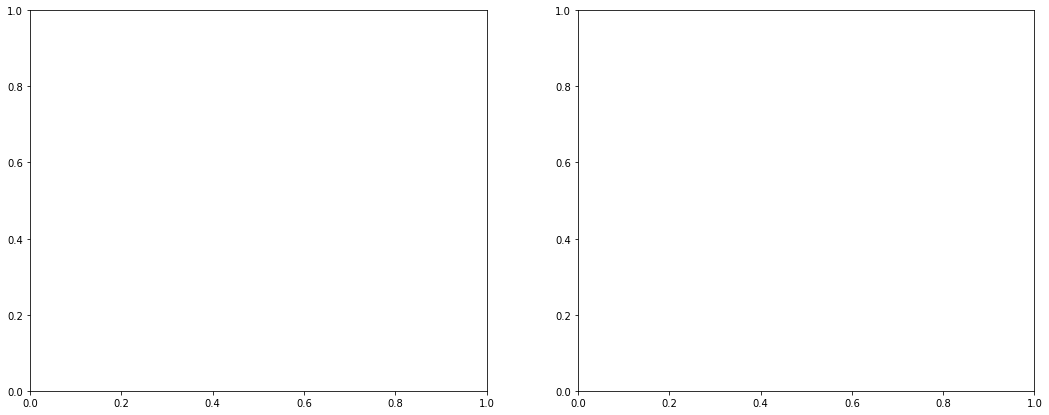

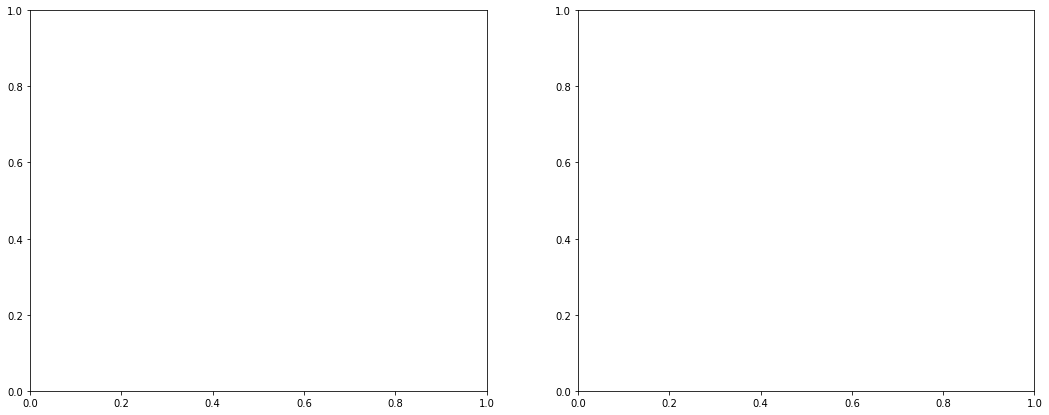

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
for k in k_range:
  fig, (ax1, ax2) = plt.subplots(1, 2) # 한 줄에 1*2 서브그래프 생성
  fig.set_size_inches(18, 7) # 전체 fig 사이즈 설정

  #ax1.set_xlim([-0.1, 1]) # 첫번째 plot
  clusterer = KMeans(n_clusters=k, random_state=0)
  cluster_labels = clusterer.fit_predict(arr)
  silhouette_avg = silhouette_score(arr, cluster_labels)
  print("For n_clusters = ", k, "The average silhouette_score is : ", silhouette_avg)


No handles with labels found to put in legend.


2551775.8701542923


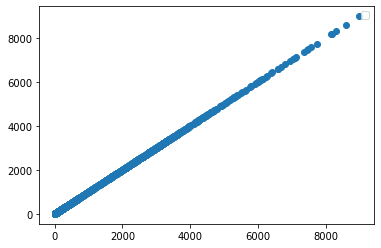

In [ ]:
file_csv_outlier = '/content/drive/My Drive/graduation/database9.3_0.3.csv'

df_out = pd.read_csv(file_csv_outlier)
variation_out = df_out['글루탐산(Glutamic acid, GLU, mg)'].var()
print(variation_out)

X_out = df_out.iloc[:,5]
Y_out = X_out

plt.scatter(X_out, Y_out)
plt.legend()
plt.show()

[2 2 3 ... 4 4 3]
[[ 270.01690821  270.01690821]
 [4387.07142857 4387.07142857]
 [2958.56495468 2958.56495468]
 [1587.01027397 1587.01027397]
 [6747.41666667 6747.41666667]]


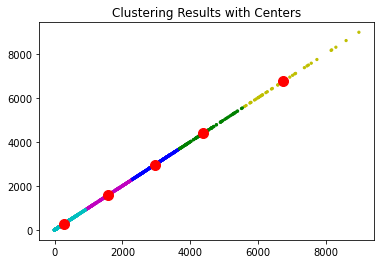

In [ ]:
arr_out = [X_out, Y_out]
arr_out = np.array(arr_out)
arr_out = np.transpose(arr_out)

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr_out) 
print(kmeans.labels_)
colormap = np.array(['c', 'g', 'b', 'm', 'y'])
plt.scatter(arr_out[:,0], arr_out[:,0], s=5, c=colormap[pred_y])
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.title('Clustering Results with Centers')
plt.show()

[4 4 4 ... 3 3 4]
[[1256.76146789 1256.76146789]
 [ 243.84848485  243.84848485]
 [4579.75280899 4579.75280899]
 [6813.23529412 6813.23529412]
 [2249.26605505 2249.26605505]
 [3241.27016129 3241.27016129]]


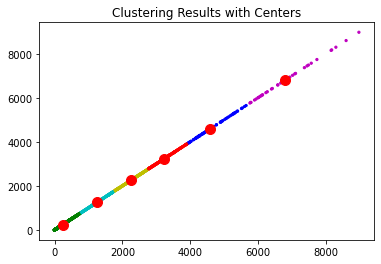

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr_out) 
print(kmeans.labels_)
colormap = np.array(['c', 'g', 'b', 'm', 'y', 'r'])
plt.scatter(arr_out[:,0], arr_out[:,0], s=5, c=colormap[pred_y])
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.title('Clustering Results with Centers')
plt.show()

[3 3 3 ... 2 2 3]
[[3405.60240964 3405.60240964]
 [ 297.24883721  297.24883721]
 [6091.8852459  6091.8852459 ]
 [1857.30057803 1857.30057803]]


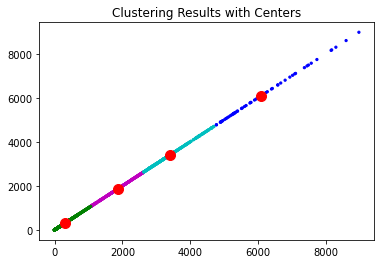

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(arr_out) 
print(kmeans.labels_)
colormap = np.array(['c', 'g', 'b', 'm'])
plt.scatter(arr_out[:,0], arr_out[:,0], s=5, c=colormap[pred_y])
print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')
plt.title('Clustering Results with Centers')
plt.show()

In [ ]:
inertia_arr = []

k_range = range(2, 16)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(arr_out)
  interia = kmeans.inertia_
  print('k : ', k, '  ', 'cost : ', interia)
  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

k :  2    cost :  2205163848.874338
k :  3    cost :  1068044356.5680825
k :  4    cost :  595355761.5999397
k :  5    cost :  387764446.9347396
k :  6    cost :  273569676.9049077
k :  7    cost :  209967997.18841302
k :  8    cost :  159298966.57412755
k :  9    cost :  121288787.98462574
k :  10    cost :  99209824.81994326
k :  11    cost :  83011379.09938227
k :  12    cost :  71288817.14037666
k :  13    cost :  60793575.268026
k :  14    cost :  50958611.79476781
k :  15    cost :  42795941.261594124


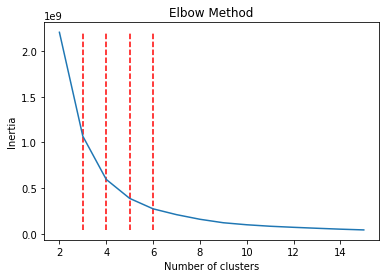

In [ ]:
plt.plot(k_range, inertia_arr)
plt.vlines(4, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')
plt.vlines(3, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')
plt.vlines(5, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')
plt.vlines(6, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--', colors='r')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters =  2 The average silhouette_score is :  0.6945358952201032
For n_clusters =  3 The average silhouette_score is :  0.6905634176256297
For n_clusters =  4 The average silhouette_score is :  0.6675468213006823
For n_clusters =  5 The average silhouette_score is :  0.6627253284115895
For n_clusters =  6 The average silhouette_score is :  0.6398374579491126
For n_clusters =  7 The average silhouette_score is :  0.5954238733948473
For n_clusters =  8 The average silhouette_score is :  0.5984048790353749
For n_clusters =  9 The average silhouette_score is :  0.583170609912567


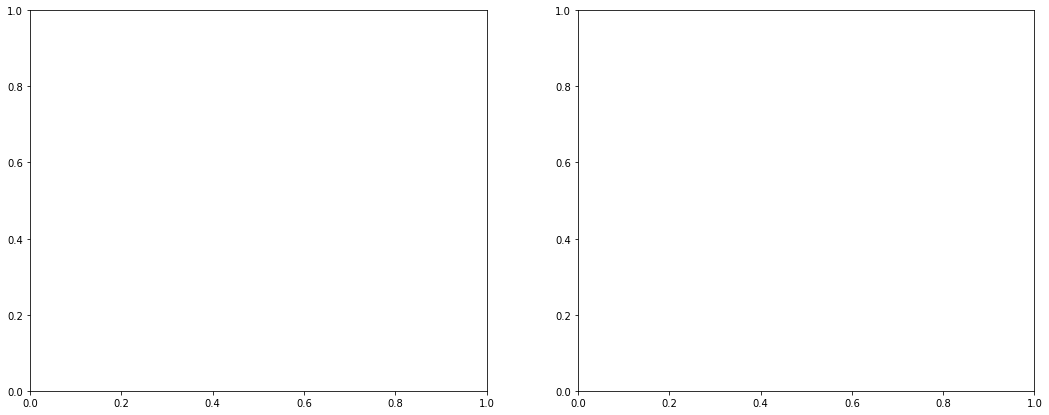

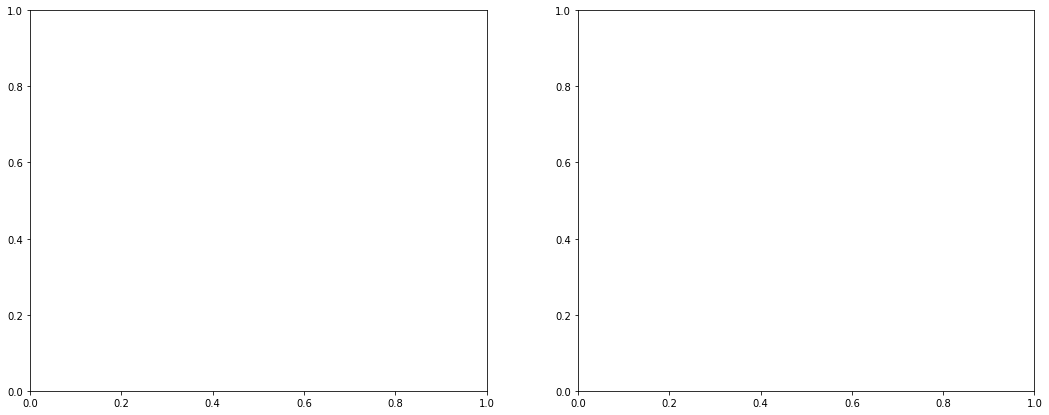

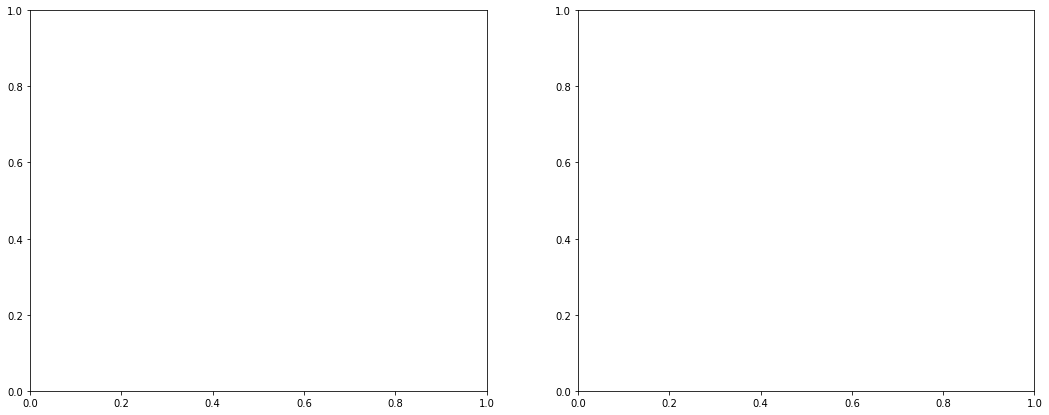

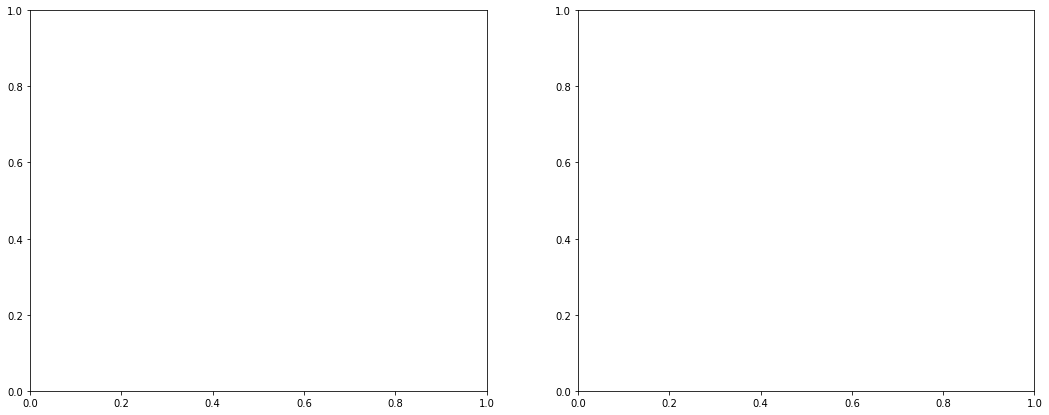

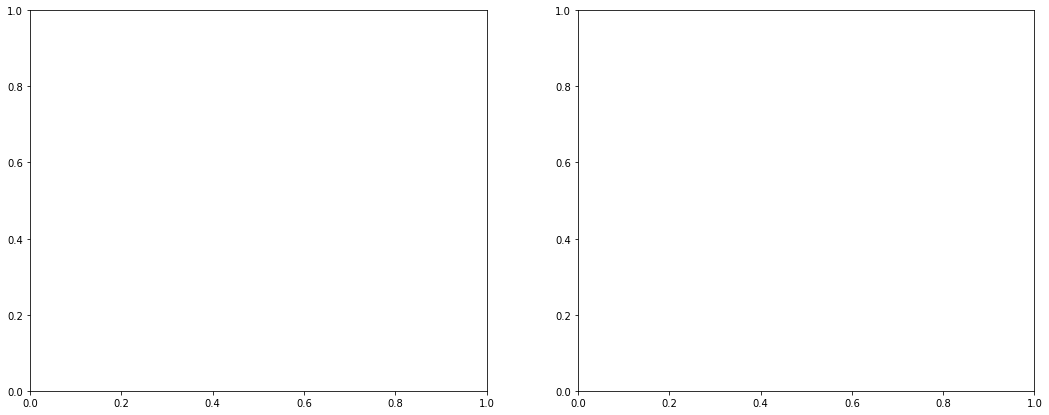

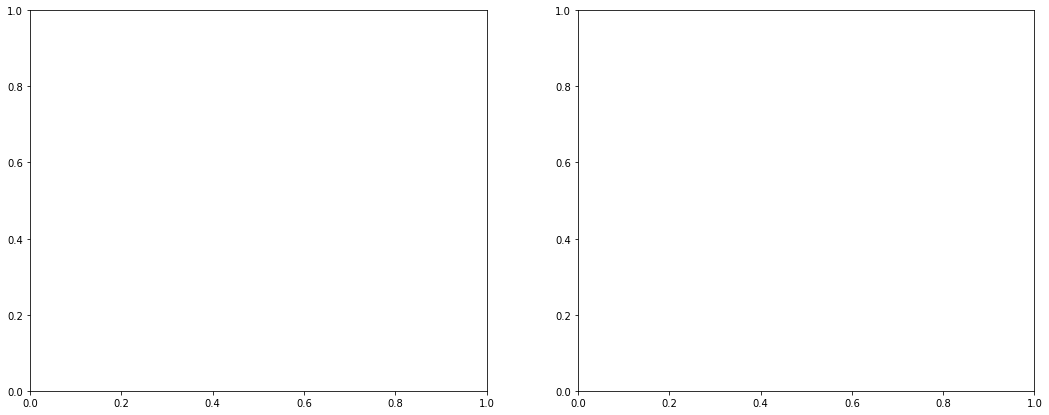

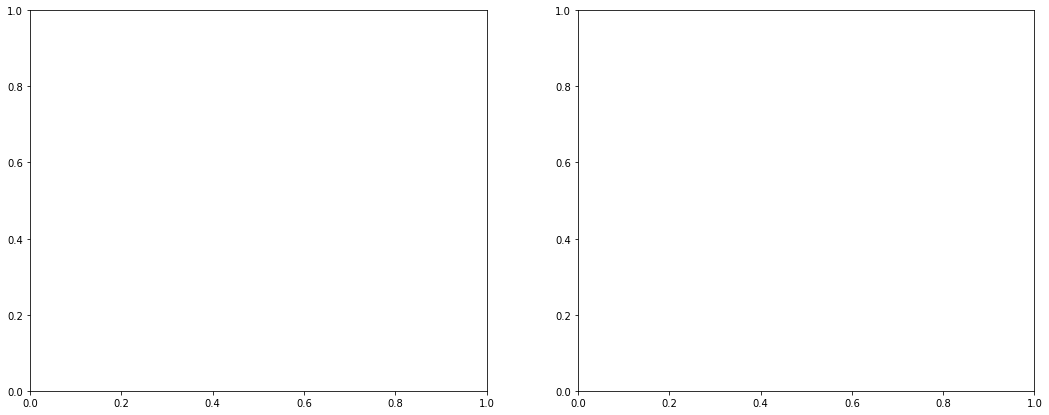

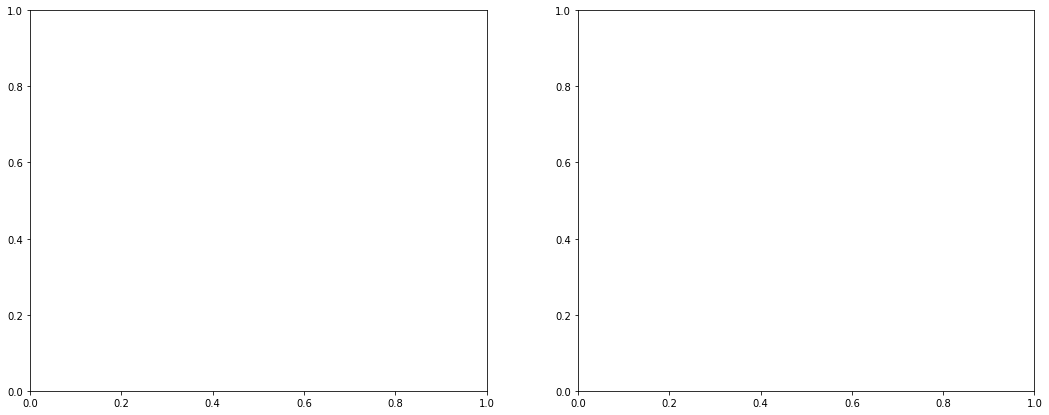

In [ ]:
k_range = range(2, 10)
for k in k_range:
  fig, (ax1, ax2) = plt.subplots(1, 2) # 한 줄에 1*2 서브그래프 생성
  fig.set_size_inches(18, 7) # 전체 fig 사이즈 설정

  #ax1.set_xlim([-0.1, 1]) # 첫번째 plot
  clusterer = KMeans(n_clusters=k, random_state=0)
  cluster_labels = clusterer.fit_predict(arr_out)
  silhouette_avg = silhouette_score(arr, cluster_labels)

  print("For n_clusters = ", k, "The average silhouette_score is : ", silhouette_avg) # 지금 느낀건데.. 저 실루엣 점수 하나가지고 판단하는건 아닌듯. 갈수록 값이 작아지니...